# Machine Learning Project
## Predicting Credit Card Account Cancellations



## Introduction
This is an individual assignment and will be a chance for you to perform an applied data science project on a real data set. 

We will be working with the `credit_card_df` data frame in this project. This data set contains information on over 4,000 customers of a U.S. bank. The description of this data and the variables contained in it are provided below.

The objective of this project is to explore the factors that lead to customers canceling their credit card accounts and develop machine learning algorithms that will predict the likelihood of a customer canceling their account in the future.

## Credit Card Account Data

The `credit_card_df` data frame contains information on the customers of a large U.S. bank which provides a number of financial services including multiple credit card offerings. 

The bank is looking to see if it can determine the factors that lead to customers canceling their credit card account and whether it can predict if a customer will cancel their account in the future. 

To maintain profits, banks must maximize the number of customers with credit lines. It is also in their best interests for customers to carry large credit card balances from month-to-month to maximize revenue from interest charges.

The bank has experienced record levels of customers closing their credit accounts in the past couple of years and this is leading to declining revenue.

The bank's goal is to become better at identifying customers at risk of canceling their account to minimize financial losses.

Specifically, the broad questions that the company is trying to answer include:

<br>

- What are the factors that are associated with customers closing their credit card accounts?
- Is it possible to predict whether a customer will close their account? If so, how accurate are the predictions?
  - How many costly errors is the model expected to produce?
- Are there any actions or policies the company can implement to reduce the risk of losing their customers?

<br>

The data set contains a mixture of customer demographics and their financial behavior.

The outcome variable in this data is `customer_status`. This variable records whether a customer eventually closed their account and indicates a financial loss to the company.

**Note**: The outcome variable has been coded as a factor with 'closed_account' (**the positive class**) as the first level. This is the format that `tidymodels` expects for calculating model performance metrics. There is no need to recode this variable in your machine learning process.

<br>

### Data Definitions

| Variable            	     | Definition                                 	                | Data Type    |
|:---------------------------|:-------------------------------------------------------------|:-------------|
| customer_status            | Customer status (closed account or active)                   | Factor       |
| age                        | Customer age                                                 | Numeric      |
| dependents                 | Number of dependents in household                            | Numeric      |
| education                  | Customer education level                                     | Factor       |
| marital_status             | Marital status                                               | Factor       |
| employment_status          | Employment status                                            | Factor       |
| income                     | Annual income (US Dollars)                                   | Numeric      |
| card_type                  | Type of credit card                                          | Factor       |
| months_since_first_account | Months since first credit card account activated             | Numeric      |
| total_accounts             | Total accounts (credit checking and savings)                 | Numeric      |
| months_inactive_last_year  | Months without credit card activity last year                | Numeric      |
| contacted_last_year        | Number of times contacted last year by sales representatives | Numeric      |
| credit_limit               | Current credit limit                                         | Numeric      |
| utilization_ratio          | Average monthly balance to credit limit                      | Numeric      |
| spend_ratio_q4_q1          | Ratio of total Q4 to Q1 spending last year                   | Numeric      |
| total_spend_last_year      | Total amount charged last year                               | Numeric      |
| transactions_last_year     | Number of transactions last year                             | Numeric      |
| transaction_ratio_q4_q1    | Ratio of total Q4 to Q1 transactions last year               | Numeric      |

In [206]:
# Load data
library(tidyverse)

credit_card_df <- readRDS(url('https://gmubusinessanalytics.netlify.app/data/credit_card_df.rds'))

In [207]:
# View data
credit_card_df

customer_status,age,dependents,education,marital_status,employment_status,income,card_type,months_since_first_account,total_accounts,months_inactive_last_year,contacted_last_year,credit_limit,utilization_ratio,spend_ratio_q4_q1,total_spend_last_year,transactions_last_year,transaction_ratio_q4_q1
<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
closed_account,46,3,masters,married,self_employed,67807,blue,36,2,3,4,4267,0.000,0.862,1067,23,0.769
closed_account,46,3,associates,married,self_employed,51785,blue,34,2,3,2,8583,0.000,0.358,1794,31,0.292
closed_account,44,4,masters,single,part_time,105643,gold,36,5,3,2,2367,0.678,0.956,4506,59,0.639
closed_account,62,1,masters,single,part_time,34138,gold,56,1,2,1,3109,0.000,1.054,5470,72,0.674
closed_account,38,1,masters,married,full_time,36264,blue,20,2,2,3,1621,0.358,0.421,1893,41,0.171
closed_account,43,3,associates,single,part_time,84234,blue,30,3,2,4,11336,0.000,0.691,1809,39,0.345
active,43,2,masters,married,full_time,35379,blue,35,3,1,3,4092,0.152,0.775,5001,88,0.492
closed_account,39,3,associates,married,part_time,67047,blue,29,4,3,4,2187,0.000,0.467,2031,40,0.333
active,54,1,masters,single,full_time,35903,gold,47,6,3,4,12873,0.000,1.005,3170,70,0.842


# Exploratory Data Analysis

In this session i have thought of 5 relavent questions explore the relationship between customer_status and the other variables in the credit_card_df data set. The goal of my analysis to discover which variables drive the differences between customers who do and do not close their account.

Each question is provide supporting data summaries with either a summary data frame (using dplyr/tidyr) or a plot (using ggplot) or both.

## Question 1


**Question**:
Was there a notable contrast in overall expenditures last year between individuals who are self-employed and those who work part-time?



**Answer**:
According to the plot, there's a clear gap in spending habits last year between self-employed individuals and those working part-time. It indicates that on average, people in part-time employment spent more overall last year, whereas those who were self-employed tended to spend less.

## Supporting Analysis

In [208]:

options(repr.plot.width=11, repr.plot.height=8)

employment_status,mean_total_spend_last_year
<fct>,<dbl>
full_time,4095.370
part_time,3585.303
self_employed,4110.731


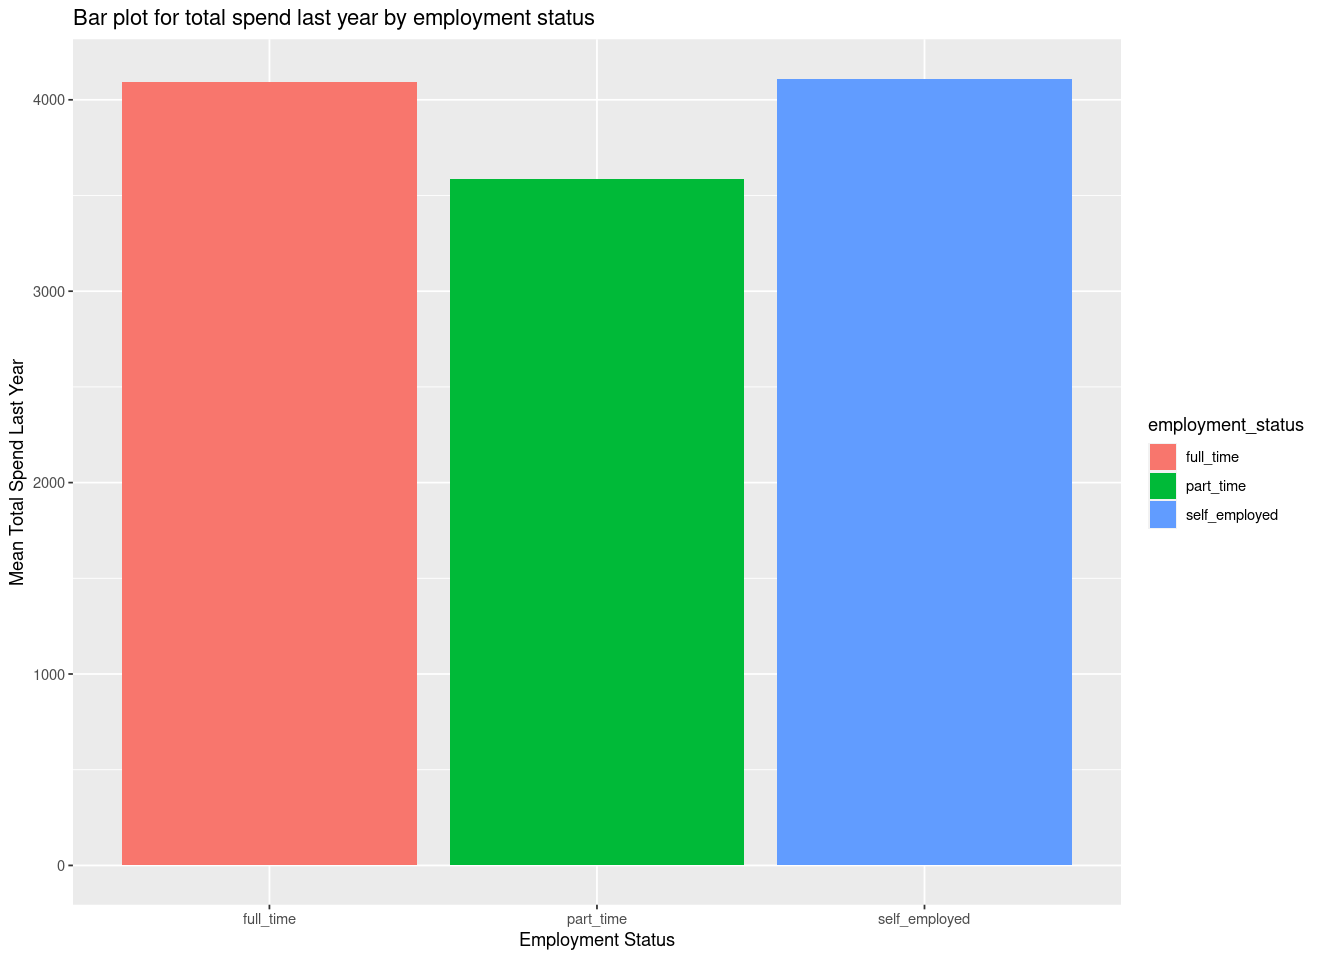

In [209]:
library(dplyr)
A1<-credit_card_df %>% select(total_spend_last_year,employment_status)%>% group_by(employment_status) %>% summarise(mean_total_spend_last_year=mean(total_spend_last_year))
View(A1)

ggplot(A1,aes(x=employment_status,y=mean_total_spend_last_year,fill=employment_status))+
  geom_bar(stat="identity")+
  labs(title="Bar plot for total spend last year by employment status",x="Employment Status",y="Mean Total Spend Last Year")

## Question 2


**Question**:how does the card type affect the credit limit,income?



**Answer**:
The clustered bar plot displays how credit limit, income, and card type are interrelated. It reveals that individuals holding premium card types tend to have higher average credit limits and incomes compared to those with other card types. Moreover, it indicates a positive association among credit limit, income, and card type.

## Supporting Analysis


In [210]:
A2<-credit_card_df %>% select(credit_limit,income,card_type)%>% group_by(card_type) %>% summarise(mean_credit_limit=mean(credit_limit),mean_income=mean(income))
View(A2)
library(plotly)
plot_ly(A2,x=~card_type,y=~mean_credit_limit,type="bar",name="Mean Credit Limit",marker=list(color="blue"))%>%
  add_trace(y=~mean_income,name="Mean Income",marker=list(color="red"))%>%
  layout(title="Clustered bar plot for credit limit and income by card type",xaxis=list(title="Card Type"),yaxis=list(title="Mean Credit Limit and Mean Income"))

card_type,mean_credit_limit,mean_income
<fct>,<dbl>,<dbl>
blue,8416.589,61409.77
silver,8634.881,63386.23
gold,8565.939,63310.02


HTML widgets cannot be represented in plain text (need html)

## Question 3


**Question**:What are the differences in utilization ratios among customers in the dataset based on their card types, namely blue, gold, and silver?



**Answer**:The box plot illustrates how the utilization ratio varies across different card types. It indicates that individuals with premium cards tend to have higher utilization ratios, while those with silver cards have lower ratios. Overall, there appears to be a positive correlation between the utilization ratio and the type of card someone holds.


## Supporting Analysis


card_type,mean_utilization_ratio
<fct>,<dbl>
blue,0.2098840
silver,0.2581875
gold,0.2573392


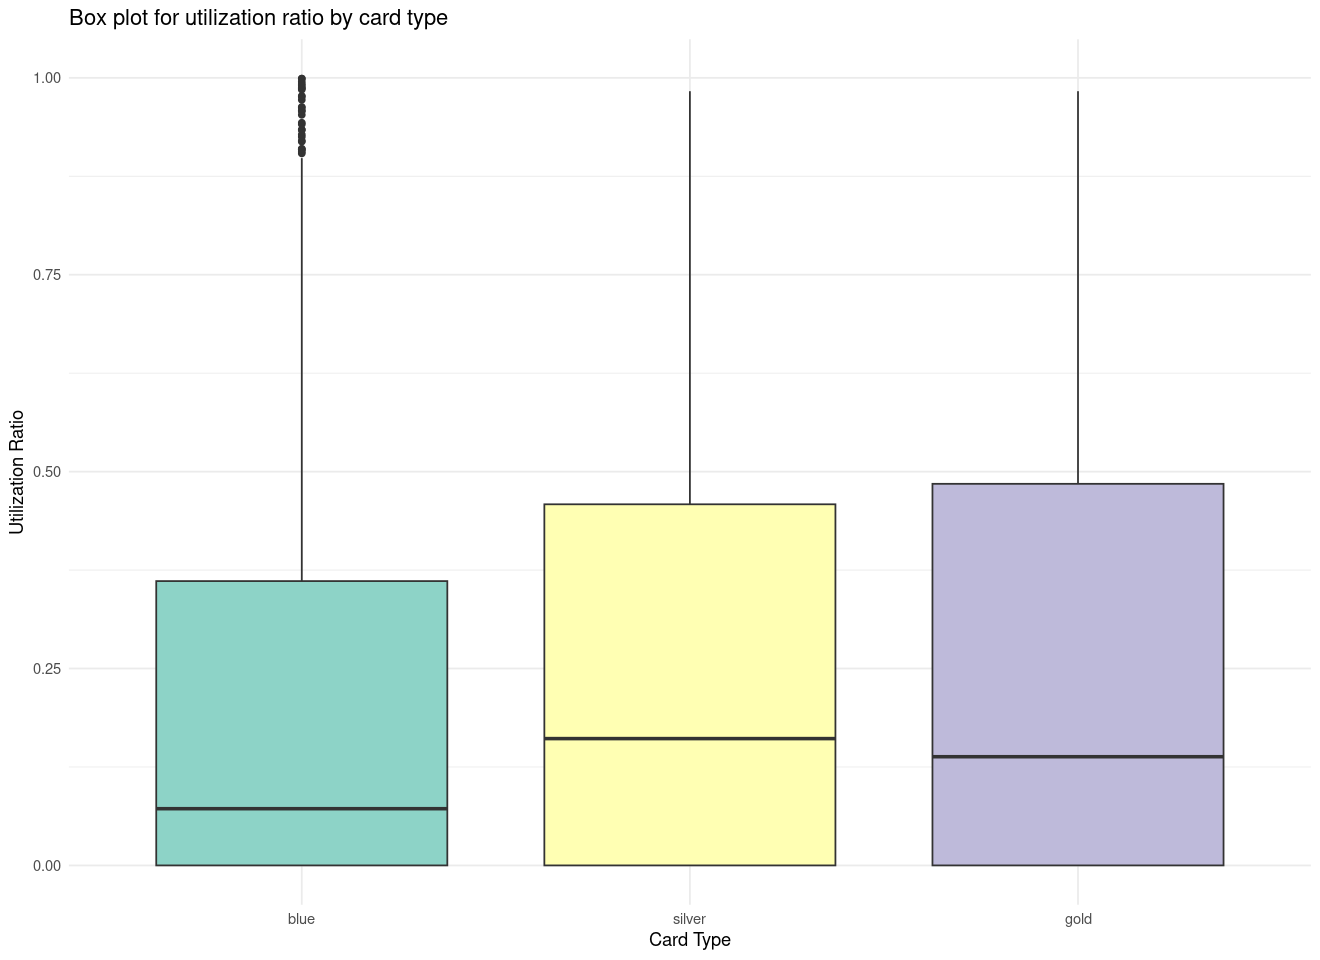

In [211]:
A3<-credit_card_df %>% select(utilization_ratio,card_type)%>% group_by(card_type) %>% summarise(mean_utilization_ratio=mean(utilization_ratio))
View(A3)

ggplot(credit_card_df,aes(x=card_type,y=utilization_ratio,fill=card_type))+
  geom_boxplot()+
  labs(title="Box plot for utilization ratio by card type",x="Card Type",y="Utilization Ratio")+theme_minimal()+theme(legend.position="none")+scale_fill_brewer(palette="Set3")

## Question 4


**Question**:is there any relation between the credit limit and the balance,education,marital_status?



**Answer**:The bubble chart depicts how credit limit, education level, and marital status are related. Larger bubbles represent higher average credit limits, while bubble color indicates average income levels. It suggests that individuals with higher education levels and who are married tend to have higher credit limits and incomes. Additionally, those with higher incomes generally have higher credit limits. Overall, the chart highlights a positive correlation between credit limit, education level, and marital status.


## Supporting Analysis


`summarise()` has grouped output by 'education'. You can override using the
`.groups` argument.


education,marital_status,mean_credit_limit,mean_income
<fct>,<fct>,<dbl>,<dbl>
associates,single,9062.219,62597.90
associates,married,8337.334,63693.54
associates,divorced,9314.325,63929.80
bachelors,single,9522.407,62885.62
bachelors,married,7430.638,63505.25
bachelors,divorced,9815.710,63043.77
masters,single,8753.864,60455.34
masters,married,7945.286,61887.48
masters,divorced,9051.201,63783.17


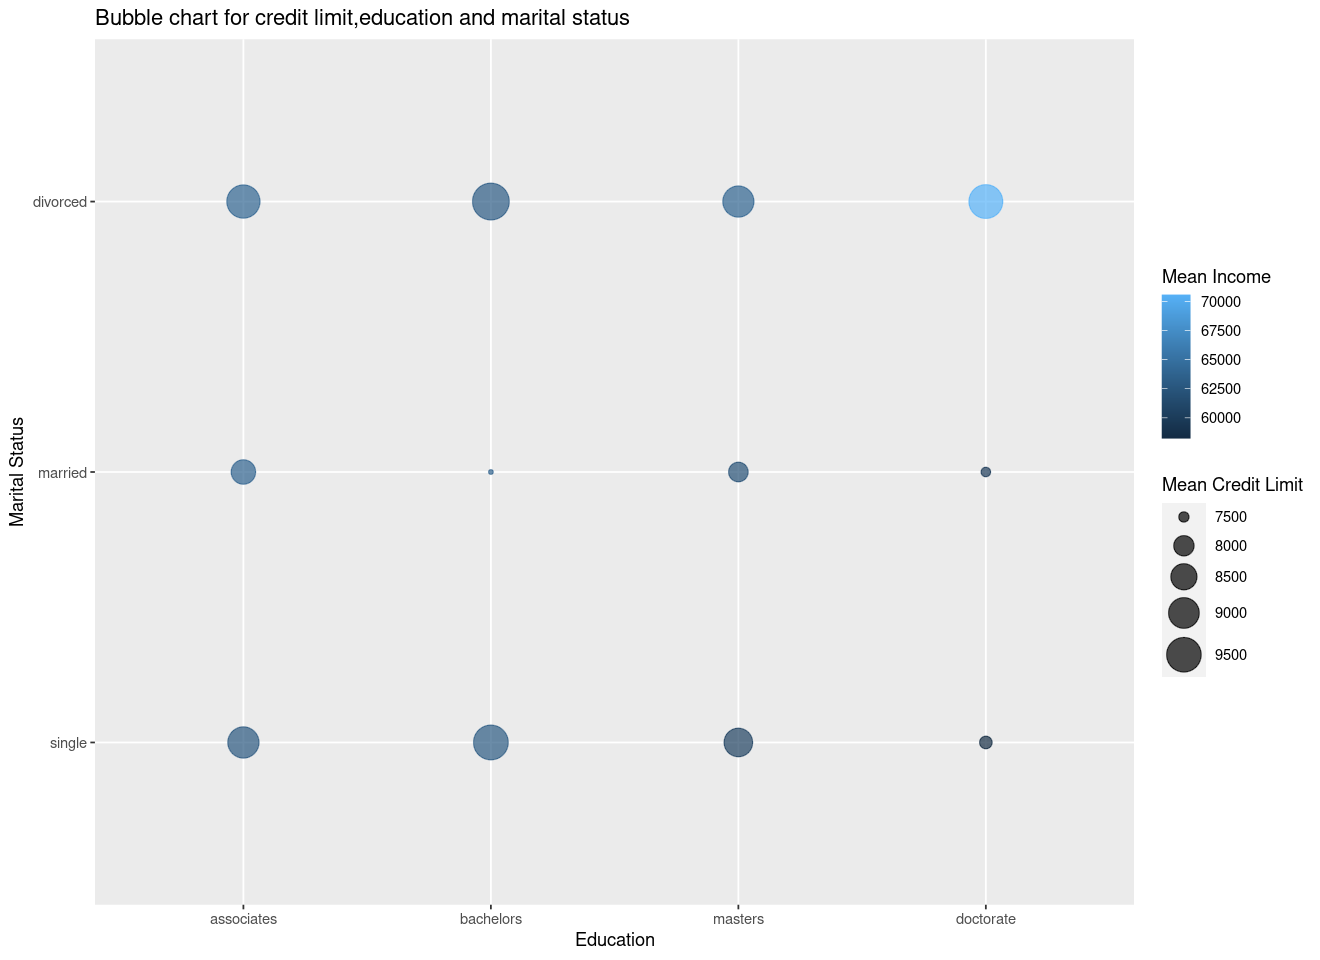

In [212]:
A4<-credit_card_df %>% select(credit_limit,income,education,marital_status)%>% group_by(education,marital_status) %>% summarise(mean_credit_limit=mean(credit_limit),mean_income=mean(income))
View(A4)
ggplot(A4,aes(x=education,y=marital_status,size=mean_credit_limit,color=mean_income))+
  geom_point(alpha=0.7)+
  scale_size_continuous(range=c(1,10))+
  labs(title="Bubble chart for credit limit,education and marital status",x="Education",y="Marital Status",size="Mean Credit Limit",color="Mean Income")

## Question 5


**Question**:Is there a correlation between months since the first account and months inactive last year?




**Answer**:The correlation between the number of months since opening the first account and the number of inactive months last year is 0.02. This suggests there's a very slight positive connection between the two variables. In simpler terms, as the time since opening the first account increases, there's a small tendency for the inactive months last year to also slightly increase



## Supporting Analysis


In [213]:
A5<-credit_card_df %>% select(months_since_first_account,months_inactive_last_year)%>% summarise(correlation=cor(months_since_first_account,months_inactive_last_year))
View(A5)

correlation
<dbl>
0.1643034


# Machine Learning Modeling 
In this section of the project, we fit **three classification algorithms** to predict the outcome variable,`customer_status`.

These are the machine learning steps that i followed. 


1. Split the `credit_card_df` data into a training and test set 
2. Specify a feature engineering pipeline with the `recipes` package
   
3. Specify a `parsnip` model object
    - I choose the following classification algorithms:
      - Logistic Regression
      - KNN
      - Random Forest
4. Package your recipe and model into a workflow
5. Fit  workflow to the training data
6. Evaluate model performance on the test set by plotting an ROC curve using `autoplot()` and calculating the area under the ROC curve on my test data

In [214]:
# Run this R code to install ML packages that you might need (Will take about 1 minute)
install.packages('vip')

Installing vip [0.4.1] ...
	OK [linked cache]


## Data Resampling
First split your data into training and test sets. If performing hyperparameter tuning, also create folds from your training data

In [215]:
library(vip)
library(rsample)
library(tidymodels)

In [216]:
set.seed(345)
split<-initial_split(credit_card_df,prop=0.75,strata=customer_status)
credit_train<-split%>%training()
credit_test<-split%>%testing()

## Feature Engineering Pipeline
Specify your feature engineering pipeline with the `recipes` package. You will use the pipeline when you create your modeling workflows below for each of your models.

In [217]:
	credit_recipe<-recipe(customer_status ~ .,data=credit_train)%>%
	  step_YeoJohnson(all_numeric(),-all_outcomes())%>%
	  step_normalize(all_numeric(),-all_outcomes())%>%
	  step_dummy(all_nominal(),-all_outcomes())

In [218]:
credit_recipe%>%
  prep(training=credit_train)%>%
  bake(new_data=NULL)

age,dependents,income,months_since_first_account,total_accounts,months_inactive_last_year,contacted_last_year,credit_limit,utilization_ratio,spend_ratio_q4_q1,⋯,customer_status,education_bachelors,education_masters,education_doctorate,marital_status_married,marital_status_divorced,employment_status_part_time,employment_status_self_employed,card_type_silver,card_type_gold
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.43279456,-0.2881061,-0.99083467,-0.15302761,-0.3954397,-1.5794583,0.3010761,-0.16025406,0.04652617,0.231974774,⋯,active,0,1,0,1,0,0,0,0,0
0.97813111,-1.0638666,-0.94348105,1.42418747,1.4424668,0.5854826,1.1707435,0.99072869,-1.04489801,1.182665510,⋯,active,0,1,0,0,0,0,0,0,1
-0.30554488,0.4742263,-0.81625083,-0.77904428,1.4424668,0.5854826,0.3010761,-0.04068920,1.08780787,-0.084861722,⋯,active,1,0,0,0,0,0,0,0,0
2.01814692,-0.2881061,-0.91116117,1.97045826,1.4424668,-0.4168643,1.1707435,-0.54514796,1.26894359,0.694480624,⋯,active,0,1,0,1,0,0,1,1,0
0.07747858,0.4742263,0.66114859,-0.02545648,-1.0455122,0.5854826,-1.5104681,0.92418358,0.27158588,0.522463292,⋯,active,0,0,0,1,0,0,0,0,1
0.71985948,1.2267268,-0.90043534,1.55986260,0.8444977,2.3058982,-0.5899284,-1.58467355,1.25020202,-0.334544260,⋯,active,0,0,0,0,1,0,0,0,0
-0.68662985,0.4742263,-1.00999510,-0.65548113,-1.0455122,-0.4168643,-0.5899284,-0.16197076,1.15199343,0.231974774,⋯,active,1,0,0,1,0,0,0,0,0
-1.06564851,-1.0638666,1.28303890,-1.38347974,0.2329186,-0.4168643,1.1707435,0.57291555,-1.04489801,-0.608241764,⋯,active,0,1,0,0,0,0,0,1,0
-1.56753565,-0.2881061,-1.13787805,-2.18706199,0.2329186,-1.5794583,0.3010761,-0.66082224,-1.04489801,-0.353749140,⋯,active,0,1,0,1,0,0,0,1,0


## Model 1 Training

In [219]:
logistic_model<-logistic_reg()%>%
  set_engine('glm')%>%
  set_mode('classification')

In [220]:
credit_wf<-workflow()%>%
  add_model(logistic_model)%>%
  add_recipe(credit_recipe)

In [221]:
credit_fit<-credit_wf%>%
  fit(data=credit_train)
credit_trained_model<-credit_fit%>%extract_fit_parsnip()

## Model 1 Performance Evaluation

In [222]:
predictions_categories<-predict(credit_fit,new_data=credit_test)
predictions_probabilities<-predict(credit_fit,new_data=credit_test,type="prob")

In [223]:
test_results<-credit_test%>%select(customer_status)%>%bind_cols(predictions_categories)%>%bind_cols(predictions_probabilities)

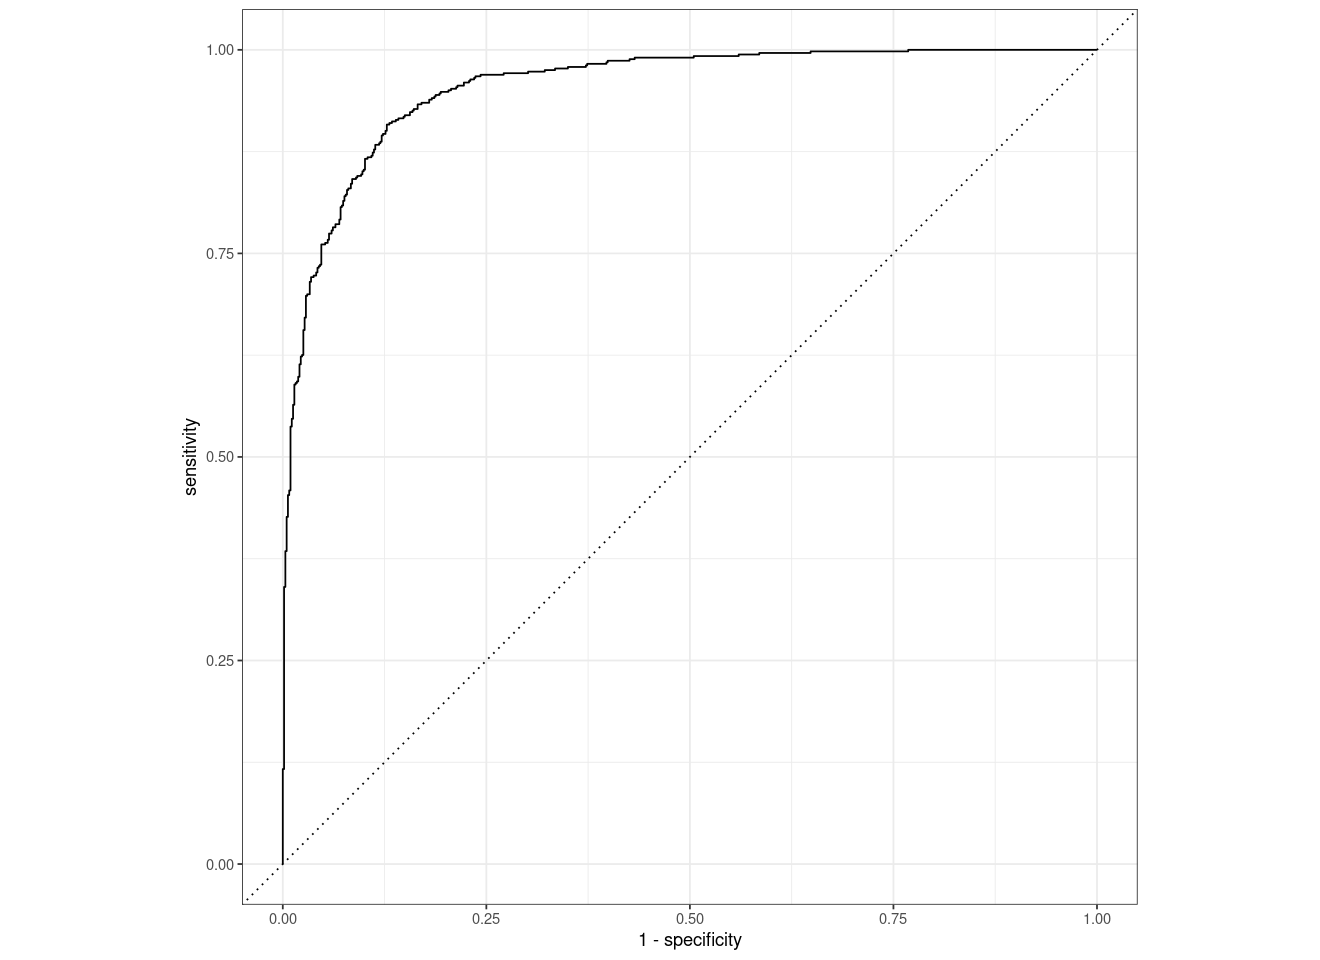

In [224]:
roc_curve(test_results, 
          truth = customer_status, 
          .pred_closed_account) %>% 
  autoplot()

In [225]:
roc_auc(test_results,
        truth = customer_status, 
        .pred_closed_account)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
roc_auc,binary,0.9545572


## Model 2 Training

In [226]:
credit_folds <- vfold_cv(credit_train, v = 5)
knn_model <- 
  nearest_neighbor(neighbors = tune()) %>% 
  set_engine('kknn') %>% 
  set_mode('classification')

In [227]:
knn_wf <- 
  workflow() %>% 
  add_model(knn_model) %>% 
  add_recipe(credit_recipe)

In [228]:

knn_tuning <- 
  knn_wf %>% 
  tune_grid(resamples = credit_folds, grid = 10)

In [229]:
knn_tuning %>% show_best('roc_auc')

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
14,roc_auc,binary,0.9205221,5,0.002593536,Preprocessor1_Model8
13,roc_auc,binary,0.9195129,5,0.002746228,Preprocessor1_Model7
12,roc_auc,binary,0.9183769,5,0.002884237,Preprocessor1_Model6
11,roc_auc,binary,0.9169205,5,0.002882434,Preprocessor1_Model5
8,roc_auc,binary,0.9118704,5,0.003187543,Preprocessor1_Model4


In [230]:
best_k <- 
  knn_tuning %>% 
  select_best(metric = 'roc_auc')

best_k

neighbors,.config
<int>,<chr>
14,Preprocessor1_Model8


In [231]:
final_knn_wf <- 
  knn_wf %>% 
  finalize_workflow(best_k)

In [232]:
last_fit_knn <- final_knn_wf %>% 
                last_fit(split = split)

In [233]:
knn_predictions <- 
  last_fit_knn %>% 
  collect_predictions()

## Model 2 Performance Evaluation

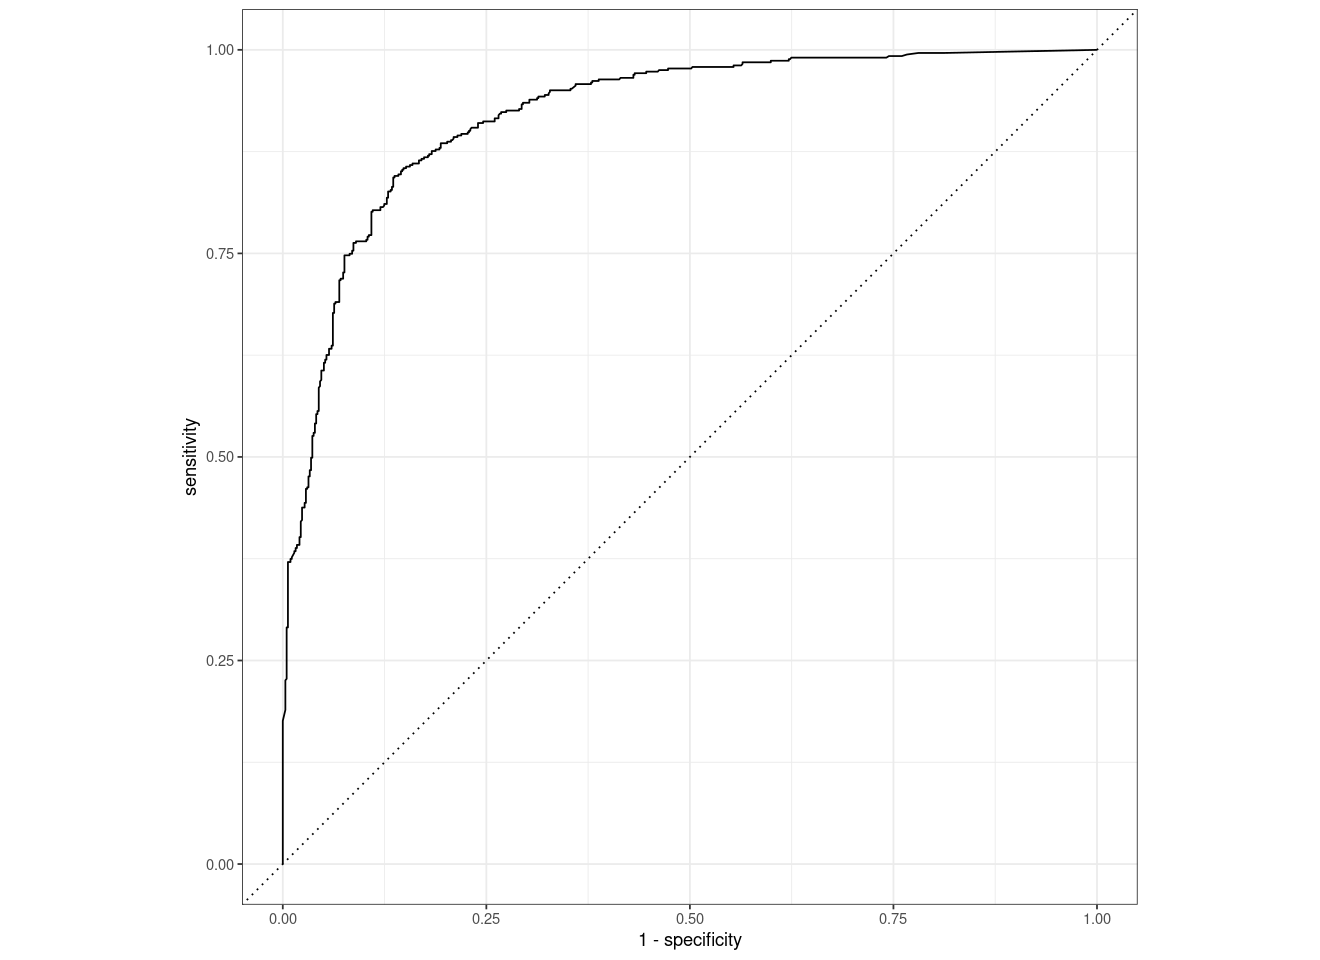

In [234]:
knn_predictions %>% 
  roc_curve(truth = customer_status, .pred_closed_account) %>% 
  autoplot()

In [235]:
last_fit_knn %>% collect_metrics()

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.8539326,Preprocessor1_Model1
roc_auc,binary,0.9207964,Preprocessor1_Model1


## Model 3 Training

In [236]:
rf_model <- 
  rand_forest(mtry = tune(),
              trees = tune(),
              min_n = tune()) %>% 
  set_engine('ranger', importance = "impurity") %>% 
  set_mode('classification')

In [237]:
rf_workflow <- 
  workflow() %>% 
  add_model(rf_model) %>% 
  add_recipe(credit_recipe)

In [238]:
rf_grid <- 
  grid_random(mtry() %>% range_set(c(2, 4)),
              trees(),
              min_n(),
              size = 10)

In [239]:
rf_tuning <- 
  rf_workflow %>% 
  tune_grid(resamples = churn_folds, grid = rf_grid)

In [240]:
rf_tuning %>% show_best('roc_auc')

mtry,trees,min_n,.metric,.estimator,mean,n,std_err,.config
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
4,1195,8,roc_auc,binary,0.9884882,5,0.002527853,Preprocessor1_Model07
4,250,13,roc_auc,binary,0.9873691,5,0.002878039,Preprocessor1_Model09
4,1180,18,roc_auc,binary,0.9871158,5,0.002789789,Preprocessor1_Model10
4,1884,27,roc_auc,binary,0.9860695,5,0.003004017,Preprocessor1_Model02
3,1581,15,roc_auc,binary,0.9856430,5,0.002935726,Preprocessor1_Model06


In [241]:
best_rf <- 
  rf_tuning %>% 
  select_best(metric = 'roc_auc')

best_rf

mtry,trees,min_n,.config
<int>,<int>,<int>,<chr>
4,1195,8,Preprocessor1_Model07


In [242]:
final_rf_workflow <- 
  rf_workflow %>% 
  finalize_workflow(best_rf)

In [243]:
rf_wf_fit <- 
  final_rf_workflow %>% 
  fit(data = credit_train)

In [244]:
rf_fit <- 
  rf_wf_fit %>% 
  extract_fit_parsnip()

In [245]:
rf_last_fit <- 
  final_rf_workflow %>% 
  last_fit(split)

## Model 3 Performance Evaluation

In [246]:
rf_last_fit %>% collect_metrics()

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.9490061,Preprocessor1_Model1
roc_auc,binary,0.9898547,Preprocessor1_Model1


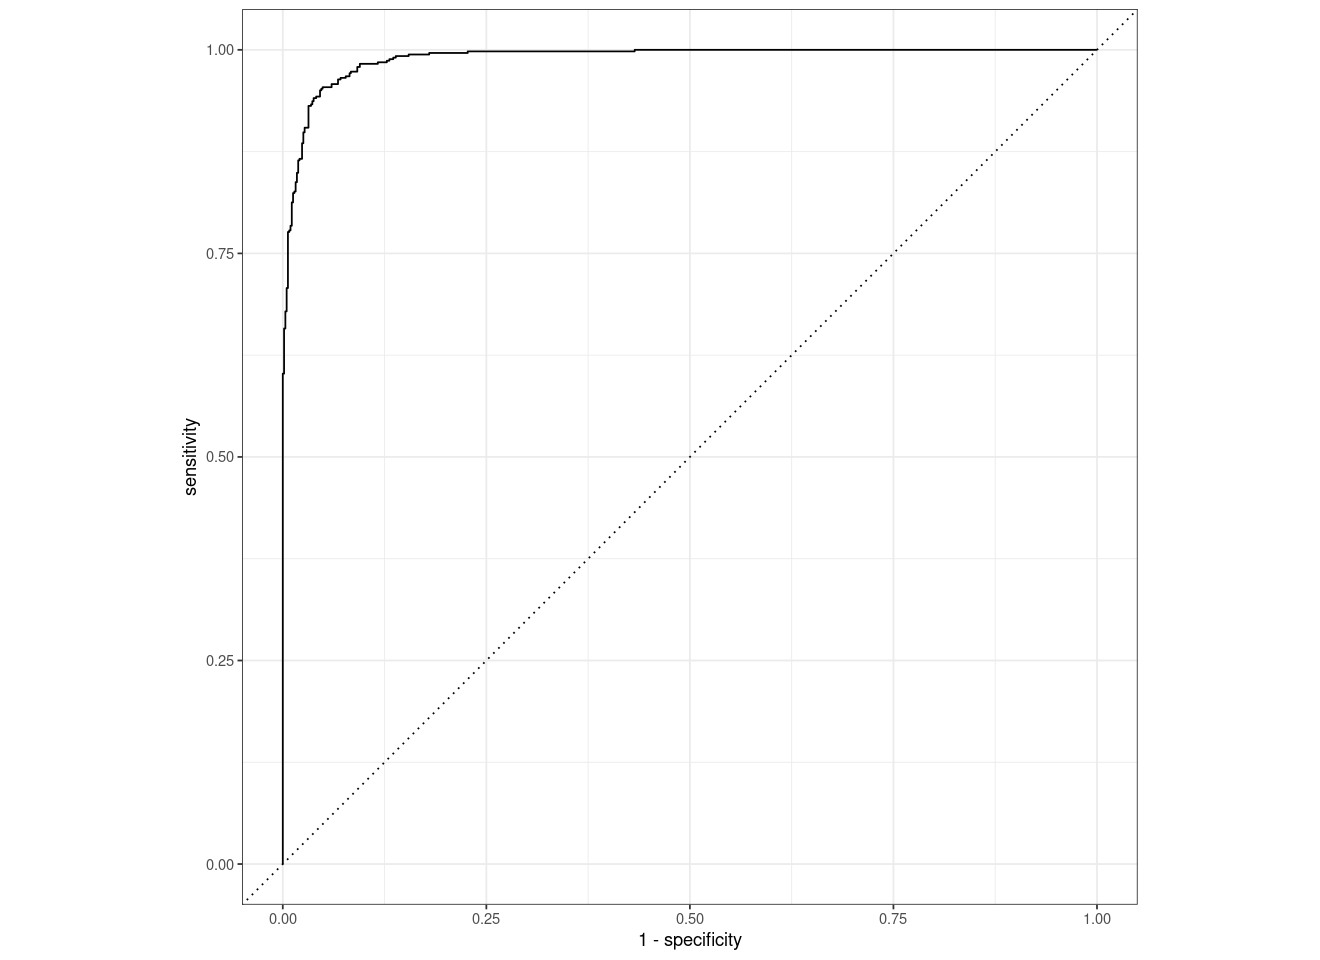

In [247]:
rf_last_fit %>% collect_predictions() %>% 
                roc_curve(truth  = customer_status, .pred_closed_account) %>% 
                autoplot()

## Introduction
Our goal with this analysis is to tackle the issue of customer retention and service within the bank. By delving into the data from credit card usage, we're aiming to pinpoint the critical elements that affect how customers behave. Ultimately, our aim is to come up with recommendations that can enhance customer retention.
In essence, we're diving into the numbers to understand what makes customers stick around or leave, and then using that insight to suggest ways to keep them happy and loyal.
## Key Findings
As we dug into the data during our exploration, we stumbled upon some intriguing discoveries. One standout is the link between credit limits and income - it seems folks with higher incomes tend to enjoy higher credit limits. Also, we noticed a considerable difference in utilization ratios across various card types, hinting that certain cards are preferred more by customers than others.
## Modeling Results
We put three classification algorithms to the test using the credit card data. Turns out, the random forest model came out on top with an impressive area under the ROC curve (AUC) of 0.98, showing it's pretty good at making predictions. The K-nearest neighbors (KNN) and logestic regression models also held their own, scoring 0.92 and 0.95 in AUC, respectively. Overall, all three models showed solid performance in predicting customer behavior.
## Recommendations
Following our analysis, we've outlined several key recommendations to uplift customer retention and service within the bank. Firstly, we propose offering personalized credit limit adjustments based on individual income levels, ensuring optimal credit utilization for each customer. Secondly, developing targeted marketing campaigns for distinct card types can effectively attract and retain customers. Additionally, implementing a customer segmentation strategy enables tailored services and offers to cater to specific customer groups. Lastly, maintaining continuous monitoring and analysis of customer behavior allows us to detect early signs of potential churn, empowering us to take proactive measures to retain customers and foster lasting relationships.